<a href="https://colab.research.google.com/github/bobby6007/kaggle_notebooks/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/diabetes 2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


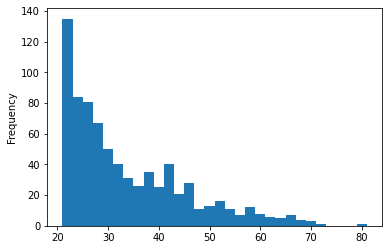

In [ ]:
df['Age'].plot.hist(bins=30)

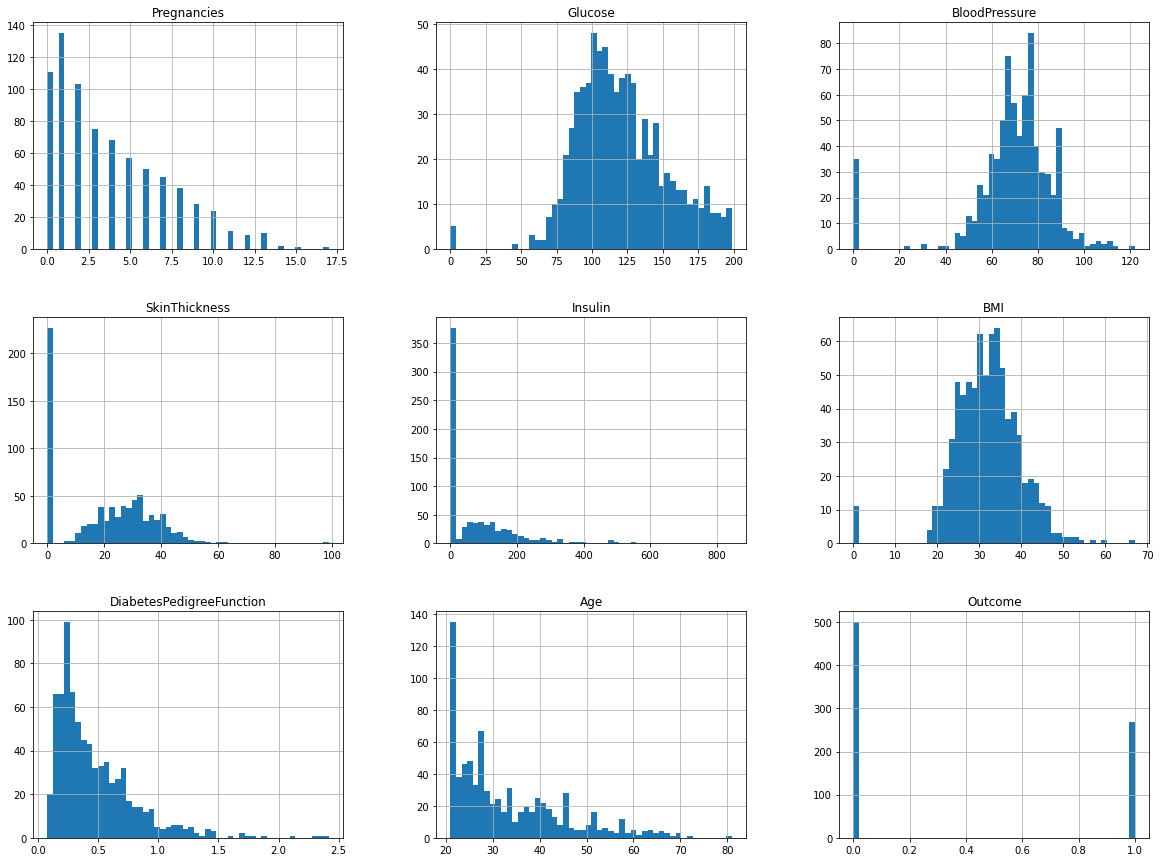

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           5                              0.65
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#Filling missing values with SimpleImputer with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.fit(df)

SimpleImputer(strategy='median')

In [ ]:
X = imputer.transform(df)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
diabetes = pd.DataFrame(X, columns=df.columns, index=df.index)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
dtype: float64

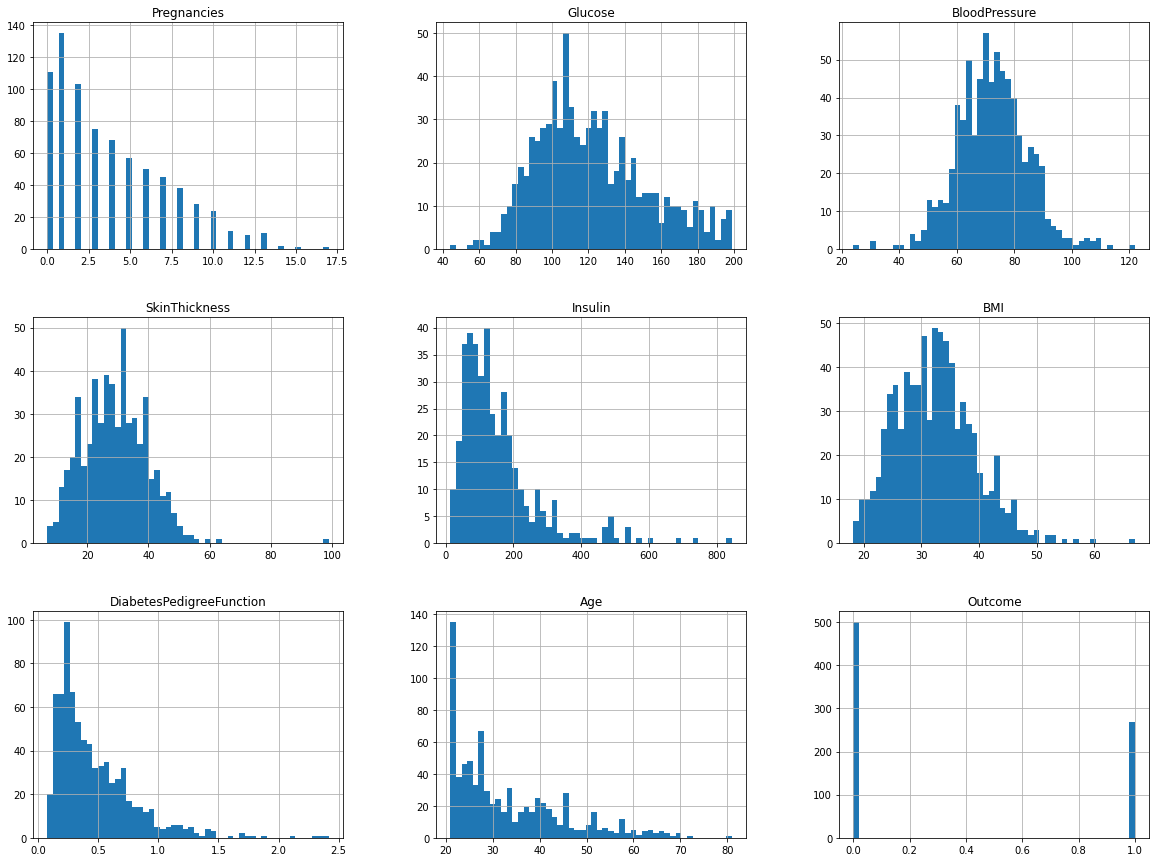

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(diabetes)

In [ ]:
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome']

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14) 

knn.fit(X_train, y_train)

In [ ]:
y_predict = knn.predict(X_test)

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.3888888888888889

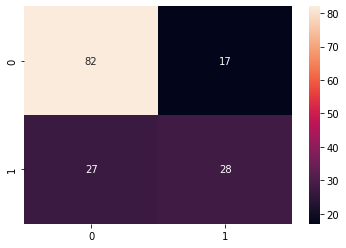

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        99
         1.0       0.62      0.51      0.56        55

    accuracy                           0.71       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [ ]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 22, 21, 20, 19, 18,  5,  6,  7,  3,  2,  4,  1,  8,  9, 17,
       11, 10, 13, 13, 12, 15, 16], dtype=int32)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 14}

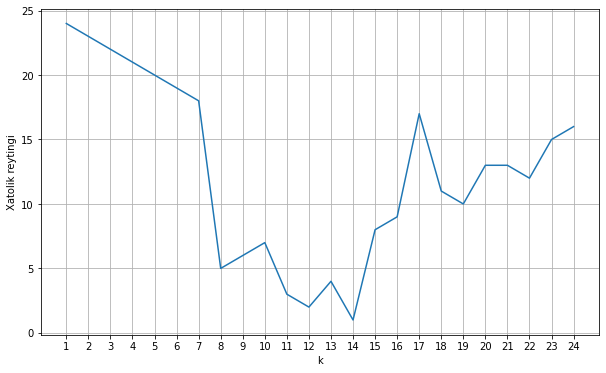

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

Random Forest"

In [ ]:
X = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values


In [ ]:
y = diabetes['Outcome'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = tree_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       202
         1.0       0.55      0.60      0.57       106

    accuracy                           0.69       308
   macro avg       0.66      0.67      0.67       308
weighted avg       0.70      0.69      0.69       308



In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       202
         1.0       0.55      0.60      0.57       106

    accuracy                           0.69       308
   macro avg       0.66      0.67      0.67       308
weighted avg       0.70      0.69      0.69       308



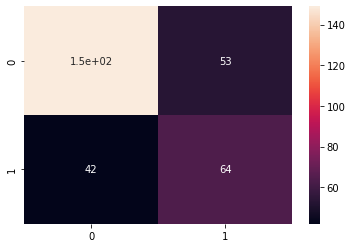

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.76      0.76       500
         1.0       0.56      0.57      0.57       268

    accuracy                           0.70       768
   macro avg       0.67      0.67      0.67       768
weighted avg       0.70      0.70      0.70       768

